In [33]:
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from bm3d import bm3d_rgb


In [34]:
def denoise_bm3d(image):
    return bm3d_rgb(image, sigma_psd=25)

In [35]:
image_directory = 'datasets/'
dataset = []
label = []

INTPUT_SIZE=64

# List images in 'no' folder
no_tumor_images = os.listdir(image_directory + 'no/')
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INTPUT_SIZE, INTPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

# List images in 'yes' folder
yes_tumor_images = os.listdir(image_directory + 'yes/')
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INTPUT_SIZE, INTPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [67]:
dataset = np.array(dataset)
label = np.array(label)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(dataset, label, train_size=0.2, random_state=0)


In [68]:
# Display shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (600, 64, 64, 3)
x_test shape: (2400, 64, 64, 3)
y_train shape: (600,)
y_test shape: (2400,)


In [69]:
from keras.utils import normalize

In [70]:
import tensorflow as tf

In [71]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
# from keras.layers 
from keras.utils import to_categorical

In [72]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

model=Sequential()

In [73]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=40, batch_size=32, verbose=1, validation_data=(x_test, y_test), shuffle=False)

# Save the model
model.save('BrainTumorceterofy10.h5')

Epoch 1/40
19/19 [==============================] - 5s 110ms/step - loss: 0.6790 - accuracy: 0.5617 - val_loss: 0.6442 - val_accuracy: 0.7283
Epoch 2/40
19/19 [==============================] - 1s 56ms/step - loss: 0.5940 - accuracy: 0.6967 - val_loss: 0.5526 - val_accuracy: 0.7267
Epoch 3/40
19/19 [==============================] - 1s 52ms/step - loss: 0.5345 - accuracy: 0.7483 - val_loss: 0.5149 - val_accuracy: 0.7550
Epoch 4/40
19/19 [==============================] - 1s 51ms/step - loss: 0.4989 - accuracy: 0.7667 - val_loss: 0.5219 - val_accuracy: 0.7504
Epoch 5/40
19/19 [==============================] - 1s 60ms/step - loss: 0.4700 - accuracy: 0.7933 - val_loss: 0.5107 - val_accuracy: 0.7542
Epoch 6/40
19/19 [==============================] - 1s 67ms/step - loss: 0.4609 - accuracy: 0.8150 - val_loss: 0.4782 - val_accuracy: 0.7700
Epoch 7/40
19/19 [==============================] - 1s 70ms/step - loss: 0.4133 - accuracy: 0.8317 - val_loss: 0.4402 - val_accuracy: 0.7925
Epoch 8/40
1

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
from keras.models import load_model
model=load_model('BrainTumorceterofy10.h5')

In [75]:
img=cv2.imread('pred\pred0.jpg')

1/1 [==============================] - 0s 115ms/step


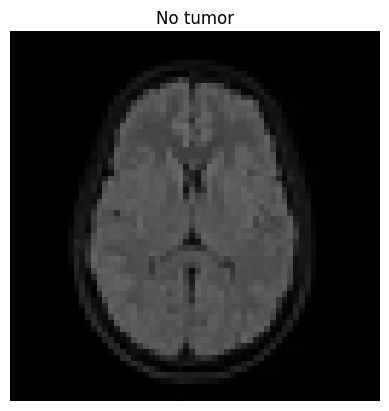

In [76]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pre-trained model loaded, replace 'model' with your actual model variable
# For example: model = load_model('your_model.h5')

# Assuming 'img' is your input image as a NumPy array
# If you have a file path instead, use: img = Image.open('your_image.jpg')
# Make sure to adjust the file path accordingly.

img = Image.fromarray(img)
img = img.resize((64, 64))
img_array = np.array(img)
input_img = np.expand_dims(img_array, axis=0)

# Assuming your model predicts probabilities for each class, use predict instead of predict_classes
# The use of predict_classes is deprecated in newer versions of TensorFlow/Keras.
# Use model.predict() and then find the index of the maximum value to get the predicted class.
predictions = model.predict(input_img)
predicted_class = np.argmax(predictions)

plt.imshow(img_array)
plt.axis('off')  # Turn off axis labels
plt.title("Brain Tumor is present" if predicted_class == 1 else "No tumor")
plt.show()

In [81]:
img=cv2.imread('pred\pred7.jpg')

1/1 [==============================] - 0s 26ms/step


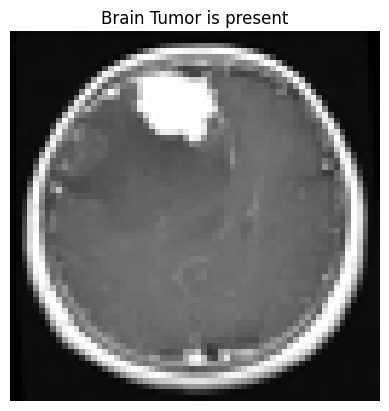

In [82]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pre-trained model loaded, replace 'model' with your actual model variable
# For example: model = load_model('your_model.h5')

# Assuming 'img' is your input image as a NumPy array
# If you have a file path instead, use: img = Image.open('your_image.jpg')
# Make sure to adjust the file path accordingly.

img = Image.fromarray(img)
img = img.resize((64, 64))
img_array = np.array(img)
input_img = np.expand_dims(img_array, axis=0)

# Assuming your model predicts probabilities for each class, use predict instead of predict_classes
# The use of predict_classes is deprecated in newer versions of TensorFlow/Keras.
# Use model.predict() and then find the index of the maximum value to get the predicted class.
predictions = model.predict(input_img)
predicted_class = np.argmax(predictions)

plt.imshow(img_array)
plt.axis('off')  # Turn off axis labels
plt.title("Brain Tumor is present" if predicted_class == 1 else "No tumor")
plt.show()